<a href="https://colab.research.google.com/github/KARENCMP82/SQL/blob/main/parte_1_para_seguir_los_videos_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL en Google Colab con la librería SQLite.


[Librería SQLite](https://www.sqlitetutorial.net/)

## Importamos las librerias y montamos el drive de Google en nuestro Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
import sqlite3
import pandas as pd

In [ ]:

database = '/content/drive/MyDrive/Colab Notebooks/SQL/parte1.db'
conexion = sqlite3.connect(database)
cursor = conexion.cursor()
print("Conexión y cursor creados exitosamente.")


#Parte 1 Introducción:

In [5]:
import os

database = '/content/drive/MyDrive/Colab Notebooks/SQL/parte1.db'
if os.path.exists(database):
    print("Archivo encontrado.")
else:
    print("Archivo no encontrado. Verifica la ruta o si el archivo está en Google Drive.")


Archivo no encontrado. Verifica la ruta o si el archivo está en Google Drive.


## **Tipos de datos**


* **CHAR** (longitud) se utiliza para guardar cadenas de caracteres de longitud fija
especificada entre paréntesis. El espacio no utilizado se rellena con blancos.


* **VARCHAR** (longitud) almacena cadenas de caracteres de longitud variable
cuyo límite máximo es especifica como longitud.


* **NUMBER**(escala, precisión) se utiliza para guardar datos numéricos. La escala
indica el número total de dígitos y la precisión el número de posiciones
decimales


* **DATE** puede almacenar fechas. En algunos SGDBR también se puede almacenar
la hora en este tipo de datos.





## **Identificadores**

Son nombres que sirven para identificar objetos de la base de datos: usuarios, tablas,
columnas. El estándar define que pueden tener hasta 18 caracteres empezando con un
carácter alfabético y continuando con caracteres numéricos y alfabéticos.


En la práctica, algunos productos no permiten nombres de usuario de más de ocho
caracteres, pudiendo incluir hasta 30 ó más en los nombres de tablas y columnas.

## **Operadores y expresiones**

Las sentencias SQL pueden incluir expresiones constituidas por nombres de columnas,
constantes, funciones y operadores.

Por ejemplo la siguiente sentencia visualizará el apellido, la fecha de alta, el salario y la
suma del salario con un complemento o gratificación de 1000 Euros de todos los
empleados

In [4]:
query = '''

SELECT apellido, fecha_al, salario, salario + 1000 FROM empleados;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)


NameError: name 'cursor' is not defined

## **Constantes**

### Constantes numéricas

Construidas mediante una cadena de dígitos que puede llevar un punto decimal, y que
pueden ir precedidos por un signo + ó -. (Ej.: -2454.67)
También se pueden expresar constantes numéricas empleado el formato de coma flotante.
(Ej.: 34.345E-8).


In [ ]:
query = '''

SELECT 10100 as numérica;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,numérica
0,10100


### Constantes de cadena

Consisten en una cadena de caracteres encerrada entre comillas simples. (Ej.: 'Hola
Mundo').



In [ ]:
query = '''

SELECT 'Hola Mundo es un string' as Cadena;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,Cadena
0,Hola Mundo es un string


### Constantes de fecha

En realidad las constantes de fecha, en Sqlite y otros productos que soportan este tipo, se
escriben como constantes de cadena sobre las cuales se aplicarán las correspondientes
funciones de conversión (ver TO_DATE en ORACLE) o bien, el gestor de la base de datos realizará una conversión automática
de tipo. (Ej.: '27-SEP-1997').

In [ ]:
query = '''

SELECT datetime('now');

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,datetime('now')
0,2023-10-21 19:36:13


## **Operadores aritméticos**

Se emplean para realizar cálculos. Son los ya conocidos: ( + , - , * , / ).
Devuelven un valor numérico como resultado de realizar los cálculos indicados.

In [ ]:
query = '''

select  5+5, 5*5

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,5+5,5*5
0,10,25


## **Operadores de concatenación**

Para unir dos o más cadenas se utiliza el operador de concatenación ||


Ej.: 'buenos' || 'días' daría como resultado 'buenosdias'

In [ ]:
query = '''

select  'buenos',
        'dias',
        'buenos'||'dias'

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,'buenos','dias','buenos'||'dias'
0,buenos,dias,buenosdias


## **Operadores de comparación**

Igual: =


Distinto: != (o <>)


Menor que: <


Mayor que: >


Menor o igual: <=


Mayor o igual: >=


Otros operadores IS NULL, BETWEEN, LIKE,
IN, etcétera.

**Las expresiones formadas con operadores de comparación dan como resultado un valor de
tipo verdadero/falso (true/false).**

**Ejemplo:**
La expresión: APELLIDO = 'JIMENEZ' será verdadera (true) en el caso de que el valor
de la columna APELLIDO (suponemos que se trata de una columna) sea 'JIMENEZ' y
falsa (false) en caso contrario.


La expresión: SALARIO > 300000 será verdadera (true) en el caso de que SALARIO
tenga un valor superior a 300000 y falsa (false) en caso contrario.


Estos operadores de comparación se utilizan fundamentalmente para construir condiciones
de búsqueda en la base de datos. De esta forma se seleccionarán aquellas filas que cumplan
la condición especificada (aquellas filas para las que el valor de la expresión sea true). Por
ejemplo, el siguiente comando seleccionará todas las filas de la tabla empleados que en la
columna OFICIO aparezca el valor 'VENDEDOR'.


In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE OFICIO = 'VENDEDOR';

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)


,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,4000.0,30
1,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,16000.0,30
2,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30


## El valor NULL

En SQL la ausencia de valor se expresa como valor nulo (NULL). Esta ausencia de valor
o valor nulo no equivale en modo alguno al valor 0.


**Cualquier expresión aritmética que contenga algún valor nulo retornará un valor
nulo.**


Así, por ejemplo, si intentamos visualizar la expresión formada por las columnas
SALARIO + COMISION de la tabla empleados la salida será similar a la siguiente:

In [ ]:
query = '''

SELECT APELLIDO, SALARIO, COMISION, SALARIO + COMISION FROM EMPLEADOS;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,APELLIDO,SALARIO,COMISIÓN,SALARIO + COMISIÓN
0,ALONSO,14000,4000.0,18000.0
1,LOPEZ,13500,NaN,NaN
2,MARTIN,15000,16000.0,31000.0
3,GARRIDO,38500,NaN,NaN
4,MARTINEZ,24500,NaN,NaN
5,REY,60000,NaN,NaN
6,CALVO,18000,0.0,18000.0
7,GIL,33500,NaN,NaN
8,JIMENEZ,14000,NaN,NaN


En el ejemplo anterior observamos que la expresión SALARIO + COMISION retornará
un valor nulo siempre que alguno de los valores sea nulo incluso aunque el otro no lo sea.


También podemos observar que el valor 0 en la comisión retorna el valor calculado de la
expresión.

**En SQL un valor nulo ni siquiera es igual a otro valor nulo** tal como podemos
apreciar en el siguiente ejemplo:

In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE COMISION = NULL;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO


La explicación es que un valor nulo es indeterminado, y por tanto, no es igual ni distinto
de otro valor nulo.

Cuando queremos comprobar si un valor es nulo emplearemos el operador IS NULL (o
IS NOT NULL para comprobar que es distinto de nulo):

In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE COMISION IS NULL

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,None,10
1,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,None,30
2,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,None,10
3,7839,REY,PRESIDENTE,NaN,17/11/81,60000,None,10
4,7876,GIL,ANALISTA,7782.0,06/05/82,33500,None,20
5,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,None,20


Como acabamos de ver los valores nulos en muchas ocasiones pueden representar un
problema, especialmente en columnas que contienen valores numéricos. Para evitar estos
problemas se suele utilizar:


* La restricción NOT NULL (es una orden de definición de datos) que impide que
se incluyan valores nulos en una columna cuando se crea una tabla.
* La función COALESCE() que se utiliza para
devolver un valor determinado en el caso de que el valor del argumento sea
nulo.

Por ejemplo COALESCE(COMISION, 0) retornará 0 cuando el valor de comisión
sea nulo.


In [ ]:
query = '''

SELECT  COMISION AS COMISION1,
        COALESCE(COMISION,0) AS COMISION2 FROM EMPLEADOS

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,COMISION1,COMISION2
0,4000.0,4000.0
1,NaN,0.0
2,16000.0,16000.0
3,NaN,0.0
4,NaN,0.0
5,NaN,0.0
6,0.0,0.0
7,NaN,0.0
8,NaN,0.0


## **Operadores logicos: AND, OR y NOT**

Ya hemos indicado que los operadores de comparación devuelven un valor lógicos de tipo
verdadero/falso (true/false). En ocasiones se necesita trabajar con varias expresiones de
comparación (por ejemplo cuando queremos formar una condición búsqueda que cumpla
dos condiciones, etcétera) en estos casos debemos recurrir a los operadores lógicos AND,
OR y NOT .


Supongamos que queremos consultar los empleados cuyo OFICIO = 'VENDEDOR' y que
además su SALARIO > 150000. En este caso emplearemos el operador lógico AND. Este
operador devolverá el valor true cuando los dos operandos o expresiones son
verdaderas. Simplificando podemos decir que se utiliza cuando queremos que se cumplan
las dos condiciones.

In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE OFICIO = 'VENDEDOR' AND SALARIO > 15000;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30


Cuando lo que queremos es buscar filas que cumplan alguna de las condiciones que se
indican emplearemos el operador OR. Este operador devolverá el valor true cuando
alguno de los dos operandos o expresiones es verdadero (cuando se cumple la primera
condición, o la segunda o ambas)

In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE OFICIO = 'VENDEDOR' OR SALARIO > 15000;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,4000.0,30
1,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,16000.0,30
2,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,NaN,30
3,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,NaN,10
4,7839,REY,PRESIDENTE,NaN,17/11/81,60000,NaN,10
5,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30
6,7876,GIL,ANALISTA,7782.0,06/05/82,33500,NaN,20


El operador NOT se utiliza para cambiar el valor devuelto por una expresión lógica o de
comparación, tal como se ilustra en el siguiente ejemplo:

In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE NOT OFICIO = 'VENDEDOR' ;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,None,10
1,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,None,30
2,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,None,10
3,7839,REY,PRESIDENTE,NaN,17/11/81,60000,None,10
4,7876,GIL,ANALISTA,7782.0,06/05/82,33500,None,20
5,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,None,20


Observamos en el ejemplo anterior que han sido seleccionadas aquellas filas en las que no
se cumple la condición de que el oficio sea vendedor.


Podemos formar expresiones lógicas en las que intervengan varios operadores lógicos de
manera similar a como se haría con expresiones aritméticas en las que intervienen varios
operadores aritméticos.

In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE NOT OFICIO = 'VENDEDOR' AND SALARIO > 15000;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,None,30
1,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,None,10
2,7839,REY,PRESIDENTE,NaN,17/11/81,60000,None,10
3,7876,GIL,ANALISTA,7782.0,06/05/82,33500,None,20


In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE OFICIO = 'VENDEDOR' AND SALARIO > 15000 OR DEP_NO = 20;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30
1,7876,GIL,ANALISTA,7782.0,06/05/82,33500,NaN,20
2,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,NaN,20


En todo caso deberemos tener en cuenta la prioridad o precedencia del operador ya que
puede afectar al resultado de la operación.


A continuación se detallan las tablas de valores de los operadores lógicos NOT, AND y
OR, teniendo en cuenta todos los posibles valores incluida la ausencia de valor (NULL).


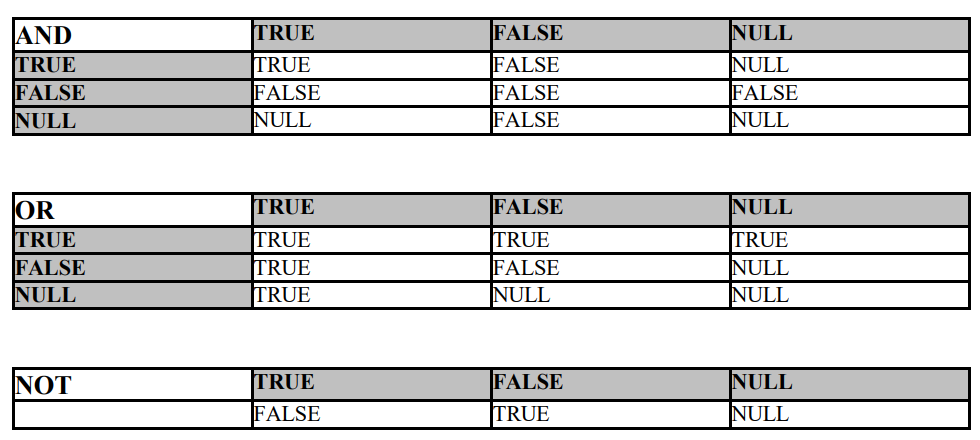

Podemos establecer:
* El operador AND devolverá true cuando los dos operandos sean verdaderos, y
false cuando algún operando sea falso; en el caso de que ambos operandos
tengan valor Null devolverá Null y cuando ningún operando es False y algún
operando es Null también devolverá Null.


* El operador OR devolverá true cuando alguno de los operandos sea verdadero
(con independencia de que el otro sea verdadero, falso o nulo); false cuando los
dos operandos sean falsos; y null en los demás casos (cuando ningún operando
sea verdadero y alguno sea nulo).


* El operador NOT devuelve true cuando el operando es falso, y false cuando el
operando es true; cuando el operando es nulo devuelve null.

**Precedencia o prioridad en los operadores.**


El orden de precedencia o prioridad de los operadores determina el orden de evaluación
de los operandos de una expresión.


Por ejemplo, la siguiente expresión:

12 + 24 / 6


Dará como resultado 16, ya que la división se realizará primero.


La tabla siguiente muestra los operadores disponibles agrupados y ordenados de mayor a
menor por su orden de precedencia.

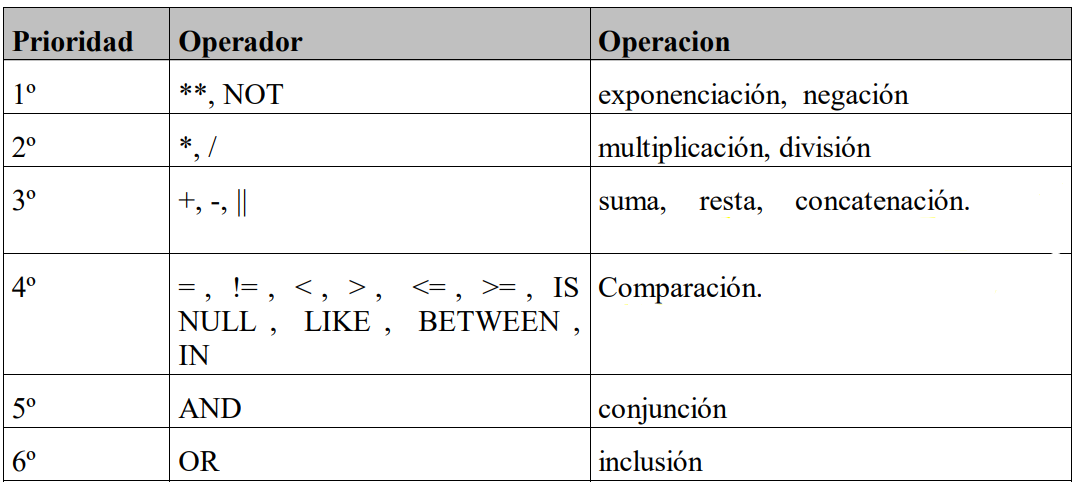

Esta es la prioridad establecida por defecto. Se puede cambiar utilizando paréntesis.

En la expresión anterior, si queremos que la suma se realice antes que la división, lo
indicaremos:

(12 + 24) / 6

En este caso el resultado será: 6

Los operadores que se encuentran en el mismo grupo tienen la misma precedencia. En
estos casos no se garantiza el orden de evaluación. Si queremos que se evalúen en algún
orden concreto deberemos utilizar paréntesis

NOTA: un error relativamente frecuente consiste en utilizar expresiones del tipo:

10000 >= SALARIO <= 20000


Este tipo de expresiones es ilegal y provocará un error ya que al evaluar la primera parte de la
expresión se sustituirá por un valor lógico de tipo true/false y este resultado no puede compararse
con un valor numérico. La expresión correcta sería:


SALARIO BETWEEN 10000 AND 20000

O bien:

SALARIO >= 10000 AND SALARIO <= 20000

In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE 10000 >= SALARIO <= 20000 ;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,4000.0,30
1,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,NaN,10
2,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,16000.0,30
3,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,NaN,30
4,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,NaN,10
5,7839,REY,PRESIDENTE,NaN,17/11/81,60000,NaN,10
6,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30
7,7876,GIL,ANALISTA,7782.0,06/05/82,33500,NaN,20
8,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,NaN,20


In [ ]:
query = '''

SELECT * FROM EMPLEADOS WHERE SALARIO >= 10000 AND SALARIO <= 20000;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,4000.0,30
1,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,NaN,10
2,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,16000.0,30
3,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30
4,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,NaN,20


**Ejemplos de expresiones:**

SALARIO + COMISION -> Devuelve un valor numérico como resultado de sumar al salario
del empleado la comisión correspondiente.


In [ ]:
query = '''

SELECT SALARIO+COMISION from EMPLEADOS ;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,SALARIO+COMISIÓN
0,18000.0
1,NaN
2,31000.0
3,NaN
4,NaN
5,NaN
6,18000.0
7,NaN
8,NaN



EMPLEADOS.DPT_NO = DEPARTAMENTOS.DPT_NO -> Devuelve verdadero o falso
dependiendo de que el número de departamento del empleado seleccionado coincida con el
número de departamento del departamento seleccionado.


In [ ]:
query = '''

SELECT *
from EMPLEADOS
left join DEPARTAMENTOS ON EMPLEADOS.DEP_NO = DEPARTAMENTOS.DEP_NO;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO,DEP_NO,DNOMBRE,LOCALIDAD
0,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,4000.0,30,30,VENTAS,MADRID
1,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,NaN,10,10,CONTABILIDAD,BARCELONA
2,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,16000.0,30,30,VENTAS,MADRID
3,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,NaN,30,30,VENTAS,MADRID
4,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,NaN,10,10,CONTABILIDAD,BARCELONA
5,7839,REY,PRESIDENTE,NaN,17/11/81,60000,NaN,10,10,CONTABILIDAD,BARCELONA
6,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30,30,VENTAS,MADRID
7,7876,GIL,ANALISTA,7782.0,06/05/82,33500,NaN,20,20,INVESTIGACION,VALENCIA
8,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,NaN,20,20,INVESTIGACION,VALENCIA



FECHA_AL BETWEEN ‘01/01/80’ AND ‘01/10/82’-> Devuelve verdadero si la
fecha de alta del empleado seleccionado se encuentra entre las dos fechas especificadas.


In [ ]:
query = '''

SELECT *,DATE('19'||SUBSTR(FECHA_AL,7,2)||'-'||SUBSTR(FECHA_AL,4,2)||'-'||SUBSTR(FECHA_AL,1,2)) AS NUEVA_FECHA
FROM EMPLEADOS
WHERE DATE('19'||SUBSTR(FECHA_AL,7,2)||'-'||SUBSTR(FECHA_AL,4,2)||'-'||SUBSTR(FECHA_AL,1,2)) BETWEEN '1980-01-01' AND '1981-10-10'
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO,NUEVA_FECHA
0,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,4000.0,30,1981-02-20
1,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,NaN,10,1981-05-08
2,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,16000.0,30,1981-09-28
3,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,NaN,30,1981-05-01
4,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,NaN,10,1981-06-09
5,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30,1981-09-08



COMISION IS NULL -> dará como resultado verdadero si la comisión del empleado
seleccionado no tiene ningún valor.


In [ ]:
query = '''

SELECT * FROM EMPLEADOS
WHERE COMISION IS NULL
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,None,10
1,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,None,30
2,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,None,10
3,7839,REY,PRESIDENTE,NaN,17/11/81,60000,None,10
4,7876,GIL,ANALISTA,7782.0,06/05/82,33500,None,20
5,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,None,20


## **Funciones**

### Lista de funciones de SQlite:

https://www.sqlitetutorial.net/sqlite-functions/

### Funciones de cadena

* SUBSTR : Extrae y devuelve una subcadena con una longitud predefinida que comienza en una posición especificada en una cadena fuente


* TRIM : Devuelve una copia de una cadena a la que se le han eliminado caracteres específicos del principio y del final de una cadena.


* LTRIM : Devuelve una copia de una cadena a la que se le han eliminado caracteres específicos del principio de una cadena.


* RTRIM : Devuelve una copia de una cadena a la que se le han eliminado caracteres específicos del final de una cadena.


* LENGTH : Devuelve el número de caracteres de una cadena o el número de bytes de un BLOB.


* REPLACE : Devuelve una copia de una cadena con cada instancia de una subcadena reemplazada por la otra subcadena.


* UPPER : Devuelve una copia de una cadena con todos los caracteres convertidos a mayúsculas.


* LOWER : Devuelve una copia de una cadena con todos los caracteres convertidos a minúsculas.


* INSTR : Encuentra una subcadena en una cadena y devuelve un número entero que indica la posición de la primera aparición de la subcadena.



In [ ]:
query = '''

SELECT
    SUBSTR(OFICIO,1,3) as SUBSTR,
    TRIM(OFICIO,'R') as TRIM,
    LENGTH(APELLIDO) as LENGTH_LONGITUD,
    REPLACE(OFICIO, 'DIR', 'R') as REPLACE,
    LOWER(APELLIDO) AS MINUSCULAS,
    INSTR(APELLIDO, 'Y') AS POSICION

   FROM EMPLEADOS

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,SUBSTR,TRIM,LENGTH_LONGITUD,REPLACE,MINUSCULAS,POSICION
0,VEN,VENDEDO,6,VENDEDOR,alonso,0
1,EMP,EMPLEADO,5,EMPLEADO,lopez,0
2,VEN,VENDEDO,6,VENDEDOR,martin,0
3,DIR,DIRECTO,7,RECTOR,garrido,0
4,DIR,DIRECTO,8,RECTOR,martinez,0
5,PRE,PRESIDENTE,3,PRESIDENTE,rey,3
6,VEN,VENDEDO,5,VENDEDOR,calvo,0
7,ANA,ANALISTA,3,ANALISTA,gil,0
8,EMP,EMPLEADO,7,EMPLEADO,jimenez,0


### Funciones de fecha

* FECHA : Calcula la fecha basándose en múltiples modificadores de fecha.


* HORA : Calcule la hora basándose en múltiples modificadores de fecha.


* DATETIME : Calcula la fecha y la hora en función de uno o más modificadores de fecha.


* JULIANDAY : Devuelve el día juliano, que es el número de días transcurridos desde el mediodía en Greenwich el 24 de noviembre de 4714 a.C.


* STRFTIME : Formatea la fecha según una cadena de formato especificada.

In [ ]:
query = '''

select  DATE('2023-10-21 19:36:13','start of month') as principio_mes,
        DATE('2023-10-21 19:36:13','+1 month'),
        DATE('2023-10-21 19:36:13','-1 day'),
        TIME('2023-10-21 19:36:13','+2 hours'),
        TIME('2023-10-21 19:36:13','+5 minutes'),
        JULIANDAY('2023-10-21 19:36:13'),
        STRFTIME('%d','2023-10-21 19:36:13'),
        STRFTIME('%m','2023-10-21 19:36:13')

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,principio_mes,"DATE('2023-10-21 19:36:13','+1 month')","DATE('2023-10-21 19:36:13','-1 day')","TIME('2023-10-21 19:36:13','+2 hours')","TIME('2023-10-21 19:36:13','+5 minutes')",JULIANDAY('2023-10-21 19:36:13'),"STRFTIME('%d','2023-10-21 19:36:13')","STRFTIME('%m','2023-10-21 19:36:13')"
0,2023-10-01,2023-11-21,2023-10-20,21:36:13,19:41:13,2.460239e+06,21,10


### Funciones matemáticas
* ABS :	Return the absolute value of a number


* RANDOM :	Return a random floating-point value between the minimum and maximum integer values


* ROUND :	Round off a floating value to a specified precision.

In [ ]:
query = '''

select  ABS(-1100),
        RANDOM(),
        ROUND(2.54654)

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,ABS(-1100),RANDOM(),ROUND(2.54654)
0,1100,-5432134126329113346,3.0


### Funciones de agregación

* AVG :	Return the average value of non-null values in a group


* COUNT :	Return the total number of rows in a table.


* MAX :	Return the maximum value of all values in a group.


* MIN :	Return the minimum value of all values in a group.


* SUM :	Return the sum of all non-null values in a column


* GROUP_CONCAT :	Concatenate non-null values in a column

In [ ]:
query = '''

SELECT AVG(SALARIO),
        COUNT(OFICIO),
        COUNT(DISTINCT OFICIO),
        MAX(SALARIO),
        MIN(SALARIO),
        SUM(SALARIO)

FROM EMPLEADOS
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,AVG(SALARIO),COUNT(OFICIO),COUNT(DISTINCT OFICIO),MAX(SALARIO),MIN(SALARIO),SUM(SALARIO)
0,25666.666667,9,5,60000,13500,231000


## Consultas sencillas

Realizar una consulta en SQL consiste en recuperar u obtener aquellos datos almacenados en filas y columnas de tablas de una base de datos, que cumplen unas
determinadas especificaciones. Para realizar cualquier consulta se utiliza la sentencia
**SELECT**

In [ ]:
'''

SELECT * (todos los elementos) o una lista de elementos (separados por coma)

FROM nombre de tabla

WHERE condicion o condiciones de selección

ORDER BY  orden en el que se presentaran las filas
;

 '''


'\n\nSELECT * (todos los elementos) o una lista de elementos (separados por coma)\n\nFROM nombre de tabla\n\nWHERE condicion o condiciones de selección\n\nORDER BY  orden en el que se presentaran las filas\n;\n\n '

### **Selección básica**

La consulta más sencilla consiste en recuperar una o varias columnas de una tabla.
A continuación recuperaremos todas las columnas y todas las filas de la tabla:


In [ ]:
query = '''

SELECT *

FROM EMPLEADOS
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,COMISIÓN,DEP_NO
0,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,4000.0,30
1,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,NaN,10
2,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,16000.0,30
3,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,NaN,30
4,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,NaN,10
5,7839,REY,PRESIDENTE,NaN,17/11/81,60000,NaN,10
6,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,0.0,30
7,7876,GIL,ANALISTA,7782.0,06/05/82,33500,NaN,20
8,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,NaN,20


A continuación, recuperaremos solo las columnas listadas y todas las filas:

In [ ]:
query = '''

SELECT emp_no, apellido, dep_no

FROM EMPLEADOS
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,DEP_NO
0,7499,ALONSO,30
1,7521,LOPEZ,10
2,7654,MARTIN,30
3,7698,GARRIDO,30
4,7782,MARTINEZ,10
5,7839,REY,10
6,7844,CALVO,30
7,7876,GIL,20
8,7900,JIMENEZ,20


Podemos utilizar aliases de columna si queremos que la consulta nos devuelva otro nombre para ellas:


In [ ]:
query = '''

SELECT emp_no as numero_empleado, apellido, dep_no as numero_departamento

FROM EMPLEADOS
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,numero_empleado,APELLIDO,numero_departamento
0,7499,ALONSO,30
1,7521,LOPEZ,10
2,7654,MARTIN,30
3,7698,GARRIDO,30
4,7782,MARTINEZ,10
5,7839,REY,10
6,7844,CALVO,30
7,7876,GIL,20
8,7900,JIMENEZ,20


También podemos obtener el total a cobrar por cada empleado, sumando el salario a la comisión:

In [ ]:
query = '''

SELECT apellido, salario+COMISION as salario_total

FROM empleados
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,APELLIDO,salario_total
0,ALONSO,18000.0
1,LOPEZ,NaN
2,MARTIN,31000.0
3,GARRIDO,NaN
4,MARTINEZ,NaN
5,REY,NaN
6,CALVO,18000.0
7,GIL,NaN
8,JIMENEZ,NaN


In [ ]:
query = '''

SELECT apellido, salario+COALESCE(COMISION,0) as salario_total

FROM empleados
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,APELLIDO,salario_total
0,ALONSO,18000.0
1,LOPEZ,13500.0
2,MARTIN,31000.0
3,GARRIDO,38500.0
4,MARTINEZ,24500.0
5,REY,60000.0
6,CALVO,18000.0
7,GIL,33500.0
8,JIMENEZ,14000.0


Podemos concatenar su apellido con su oficio:

In [ ]:
query = '''

SELECT apellido || ' es ' || oficio as "Empleado y su oficio"
 FROM empleados
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,Empleado y su oficio
0,ALONSO es VENDEDOR
1,LOPEZ es EMPLEADO
2,MARTIN es VENDEDOR
3,GARRIDO es DIRECTOR
4,MARTINEZ es DIRECTOR
5,REY es PRESIDENTE
6,CALVO es VENDEDOR
7,GIL es ANALISTA
8,JIMENEZ es EMPLEADO


Tambien podemos seleccionar los casos distintos dentro de una columna evitando los duplicados:

In [ ]:
query = '''

SELECT DISTINCT oficio
 FROM empleados
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,OFICIO
0,VENDEDOR
1,EMPLEADO
2,DIRECTOR
3,PRESIDENTE
4,ANALISTA


### **Selección con condiciones**

Incorporamos condiciones de selección para obtener filas específicas utilizando los operadores de comparación y los operadores lógicos.

Podemos obtener la lista de empleados "vendedores" con su apellido, salario y comisión:



In [ ]:
query = '''

SELECT apellido, salario, comision
 FROM empleados
 WHERE UPPER(oficio)='VENDEDOR'
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,APELLIDO,SALARIO,COMISION
0,ALONSO,14000,4000.0
1,MARTIN,15000,16000.0
2,CALVO,18000,0.0


Podemos seleccionar aquellos empleados cuyo apellido empiece por “M” y su salario esté
comprendido entre 10.000 y 20.000 euros. Visualizando su número de empleado,
apellido y departamento:


In [ ]:
query = '''

SELECT emp_no, apellido, dep_no
 FROM empleados
 WHERE apellido LIKE 'M%' AND salario BETWEEN 10000 and 20000
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,DEP_NO
0,7654,MARTIN,30


Seleccionar los empleados existentes en los departamentos 10 y 30:

In [ ]:
query = '''

SELECT emp_no AS 'Nº Empleado',apellido,dep_no as Departamento
 FROM empleados
 WHERE dep_no = 10 OR dep_no = 30
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,Nº Empleado,APELLIDO,Departamento
0,7499,ALONSO,30
1,7521,LOPEZ,10
2,7654,MARTIN,30
3,7698,GARRIDO,30
4,7782,MARTINEZ,10
5,7839,REY,10
6,7844,CALVO,30


In [ ]:
query = '''

SELECT emp_no AS 'Nº Empleado',apellido,dep_no as Departamento
 FROM empleados
 WHERE dep_no = 10 AND dep_no = 30
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,Nº Empleado,APELLIDO,Departamento


In [ ]:
query = '''

SELECT emp_no AS 'Nº Empleado',apellido,dep_no as Departamento
 FROM empleados
 WHERE dep_no IN (10,30)
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,Nº Empleado,APELLIDO,Departamento
0,7499,ALONSO,30
1,7521,LOPEZ,10
2,7654,MARTIN,30
3,7698,GARRIDO,30
4,7782,MARTINEZ,10
5,7839,REY,10
6,7844,CALVO,30


### **Selección con ordenación de los resultados**

También podemos ver como se utiliza la ordenación en una consulta:

In [ ]:
query = '''

SELECT *
FROM empleados
ORDER BY dep_no, apellido

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,DEP_NO,COMISION
0,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,10,NaN
1,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,10,NaN
2,7839,REY,PRESIDENTE,NaN,17/11/81,60000,10,NaN
3,7876,GIL,ANALISTA,7782.0,06/05/82,33500,20,NaN
4,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,20,NaN
5,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,30,4000.0
6,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,30,0.0
7,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,30,NaN
8,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,30,16000.0


También podemos utilizar el número de columna si no queremos escribirlo:

In [ ]:
query = '''

SELECT *
FROM empleados
ORDER BY 7, 2

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,EMP_NO,APELLIDO,OFICIO,DIRECTOR,FECHA_AL,SALARIO,DEP_NO,COMISION
0,7521,LOPEZ,EMPLEADO,7782.0,08/05/81,13500,10,NaN
1,7782,MARTINEZ,DIRECTOR,7839.0,09/06/81,24500,10,NaN
2,7839,REY,PRESIDENTE,NaN,17/11/81,60000,10,NaN
3,7876,GIL,ANALISTA,7782.0,06/05/82,33500,20,NaN
4,7900,JIMENEZ,EMPLEADO,7782.0,24/03/83,14000,20,NaN
5,7499,ALONSO,VENDEDOR,7698.0,20/02/81,14000,30,4000.0
6,7844,CALVO,VENDEDOR,7698.0,08/09/81,18000,30,0.0
7,7698,GARRIDO,DIRECTOR,7839.0,01/05/81,38500,30,NaN
8,7654,MARTIN,VENDEDOR,7698.0,28/09/81,15000,30,16000.0


Para cambiar el orden de ascendente a descendente, tenemos que aclararlo al lado de la columna en el listado de columnas a ordenar (por defecto es ascendente):

In [ ]:
query = '''

SELECT *
FROM empleados
ORDER BY 7 DESC, 2

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

### **Selección con agrupamiento y funciones de columna (o agregación)**

SQL permite agrupar las filas de una tabla, seleccionadas en una consulta, y obtener
salidas calculadas a partir de los grupos formados.

El criterio para agrupar suele ser una de las columnas de la tabla. Si no se especifica
ninguno, las filas de la tabla seleccionadas en la consulta forman un grupo único.

Importante, los valores **NULL** no intervienen en las agrupaciones ni en las funciones de agrecación o columna.

Podemos obtener la masa salarial de todos los empleados (sin agrupación):

In [ ]:
query = '''

SELECT SUM(salario)
 FROM empleados

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,SUM(salario)
0,231000


Obtener los salarios máximo, mínimo y la diferencia existente entre ambos (sin agrupación):

In [ ]:
query = '''

SELECT MAX(salario),MIN(salario),MAX(salario)-MIN(salario)
 FROM empleados

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,MAX(salario),MIN(salario),MAX(salario)-MIN(salario)
0,60000,13500,46500


Obtener la fecha de alta más reciente:

In [ ]:
query = '''

SELECT MAX( DATE('19'||SUBSTR(FECHA_AL,7,2)||'-'||SUBSTR(FECHA_AL,4,2)||'-'||SUBSTR(FECHA_AL,1,2)) ) as "Fecha alta" FROM empleados

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,Fecha alta
0,1983-03-24


Calcular el salario medio de los empleados (sin agrupación):

In [ ]:
query = '''

SELECT AVG(salario) AS salario_medio FROM empleados

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,salario_medio
0,25666.666667


In [ ]:
query = '''

SELECT ROUND(AVG(salario),2) AS salario_medio FROM empleados

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,salario_medio
0,25666.67


Importante:

COUNT(*) cuenta todas las filas existentes, mientras que COUNT("cualquier columna") cuenta solo los valores de la columna que no son NULL:

In [ ]:
query = '''

SELECT COUNT(*) AS total_filas, COUNT(comision) AS filas_con_comision
FROM empleados

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,total_filas,filas_con_comision
0,9,3


Podemos utilizar tambien la palabra DISTINCT para solamente contar aquellos casos que son distintos:

In [ ]:
query = '''

SELECT COUNT(DISTINCT oficio) AS nro_oficios
FROM empleados

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,nro_oficios
0,5


Podemos agregar agrupamiento a las consultas para obtener el resultado de una funcion de agregación o columna de todos los elementos de cada grupo.

Estas agrupaciones se formarán según los diferentes valores que tengan las columnas que decidamos utilizar en la agrupación.

Para esto debemos introducir la cláusula GROUP BY luego del WHERE y antes de ORDER BY (obligatoriamente), y pasarle una columna o lista de columnas para realizar la agrupación.

Con esto podemos obtener los salarios medios por departamento:

In [ ]:
query = '''

SELECT dep_no AS departamento, ROUND(AVG(salario),2) AS salario_medio
FROM empleados
GROUP BY dep_no

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,departamento,salario_medio
0,10,32666.67
1,20,23750.00
2,30,21375.00


Obtener cuántos empleados hay en cada departamento:

In [ ]:
query = '''

SELECT dep_no AS departamento, COUNT(*) AS nro_empleados
FROM empleados
GROUP BY dep_no

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,departamento,nro_empleados
0,10,3
1,20,2
2,30,4


Obtener el empleado que mayor salario tiene dentro de cada oficio, excluyendo al
presidente:

In [ ]:
query = '''

SELECT MAX(salario), oficio FROM empleados
 WHERE UPPER(oficio) <> 'PRESIDENTE'
 GROUP BY oficio

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,MAX(salario),OFICIO
0,33500,ANALISTA
1,38500,DIRECTOR
2,14000,EMPLEADO
3,18000,VENDEDOR


Del mismo modo que la cláusula WHERE permite la selección de filas en una sentencia
SELECT, la cláusula HAVING permite realizar una selección sobre los grupos obtenidos por
la cláusula GROUP BY.

Para esto, debemos introducir la cláusula HAVING luego del GROUP BY.

La condición de selección podrá estar formada por constantes, columnas de
agrupación y funciones de columna.

La cláusula HAVING actúa como un filtro sobre filas agrupadas, a diferencia de la
cláusula WHERE que actúa sobre las filas antes de la agrupación.

Con esto podemos seleccionar los oficios que tengan dos o más empleados:

In [ ]:
query = '''

SELECT oficio, COUNT (*) FROM empleados
 GROUP BY oficio HAVING COUNT (*) >= 2

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,OFICIO,COUNT (*)
0,DIRECTOR,2
1,EMPLEADO,2
2,VENDEDOR,3


Podemos eleccionar los oficios que tengan dos o más empleados, cuyo salario supere los
14000 euros:

In [ ]:
query = '''

SELECT oficio, COUNT (*)
 FROM empleados
 WHERE salario > 14000
 GROUP BY oficio
 HAVING COUNT (*) >= 2

;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,OFICIO,COUNT (*)
0,DIRECTOR,2
1,VENDEDOR,2


El orden del procedimiento que realiza SQL para calcular la salida con la cláusula HAVING es:



1.   A partir de la tabla sobre la que se realiza la consulta, la cláusula WHERE actúa como
un primer filtro que da como resultado una tabla interna cuyas filas cumplen la condición
especificada en el WHERE
2.   La cláusula GROUP BY produce la agrupación de las filas de la segunda tabla, dando
como resultado una tercera tabla
3.  La cláusula HAVING actúa filtrando las filas de la tercera tabla, según la condición de
selección especificada, dando como resultado la salida de la consulta

